## Reshaping

In [2]:
import pandas as pd
import numpy as np

### Stack

In [1]:
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)

In [5]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [6]:
df = pd.DataFrame(np.random.randn(8, 2), index = index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -1.192377 -2.715351
      two     1.218616  0.363519
baz   one    -0.490843 -0.457636
      two    -0.003444 -0.716453
foo   one    -1.663072 -0.510045
      two    -0.196599  1.013945
qux   one     1.020036 -0.546258
      two    -1.183770 -0.132343

In [7]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -1.192377 -2.715351
      two     1.218616  0.363519
baz   one    -0.490843 -0.457636
      two    -0.003444 -0.716453

In [8]:
# Stack() : DataFrame의 열과 행을 합친다.
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.192377
               B   -2.715351
       two     A    1.218616
               B    0.363519
baz    one     A   -0.490843
               B   -0.457636
       two     A   -0.003444
               B   -0.716453
dtype: float64

In [9]:
# Stack 해제
stacked.unstack()

A         B
first second                    
bar   one    -1.192377 -2.715351
      two     1.218616  0.363519
baz   one    -0.490843 -0.457636
      two    -0.003444 -0.716453

In [10]:
# 선택 컬럼만 unstack
stacked.unstack(1)

second        one       two
first                      
bar   A -1.192377  1.218616
      B -2.715351  0.363519
baz   A -0.490843 -0.003444
      B -0.457636 -0.716453

In [11]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.192377 -0.490843
       B -2.715351 -0.457636
two    A  1.218616 -0.003444
       B  0.363519 -0.716453

### Pivot Tables

In [12]:
df = pd.DataFrame({
    "A": ["one", "one", "two", "three"] * 3,
    "B": ["A", "B", "C"] * 4,
    "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
    "D": np.random.randn(12),
    "E": np.random.randn(12),
})
df

,A,B,C,D,E
0,one,A,foo,-0.025586,0.398458
1,one,B,foo,-0.040586,1.722480
2,two,C,foo,1.096993,0.535389
3,three,A,bar,-0.855019,0.720031
4,one,B,bar,-1.200631,0.743802
5,one,C,bar,-0.149962,0.286533
6,two,A,foo,-0.385776,2.129306
7,three,B,foo,-0.855436,1.071897
8,one,C,foo,1.987484,0.251947
9,one,A,bar,-2.123655,-0.715678


In [14]:
pd.pivot_table(df, values="D", index=['A', 'B'], columns="C")

C             bar       foo
A     B                    
one   A -2.123655 -0.025586
      B -1.200631 -0.040586
      C -0.149962  1.987484
three A -0.855019       NaN
      B       NaN -0.855436
      C  0.234230       NaN
two   A       NaN -0.385776
      B -0.044606       NaN
      C       NaN  1.096993

## Time series

In [15]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [16]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [18]:
ts.resample("5min").sum()

2012-01-01    23734
Freq: 5T, dtype: int64

In [19]:
#시간대 표현
rng = pd.date_range('3/6/2012 00:00', periods=5, freq = "D")

In [21]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.308054
2012-03-07   -0.114757
2012-03-08    1.029201
2012-03-09   -0.136063
2012-03-10   -0.814820
Freq: D, dtype: float64

In [22]:
tc_utc= ts.tz_localize("UTC")
tc_utc

In [24]:
# 다른 시간대로 변환
tc_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.308054
2012-03-06 19:00:00-05:00   -0.114757
2012-03-07 19:00:00-05:00    1.029201
2012-03-08 19:00:00-05:00   -0.136063
2012-03-09 19:00:00-05:00   -0.814820
Freq: D, dtype: float64

In [25]:
# 시간범위 표현
rng = pd.date_range('1/1/2012', periods=5, freq='M')
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [26]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.498392
2012-02-29   -1.299118
2012-03-31   -0.519955
2012-04-30    0.155482
2012-05-31   -0.150496
Freq: M, dtype: float64

In [28]:
# 월별
ps = ts.to_period()
ps

2012-01    0.498392
2012-02   -1.299118
2012-03   -0.519955
2012-04    0.155482
2012-05   -0.150496
Freq: M, dtype: float64

In [32]:
ps.to_timestamp()

2012-01-01    0.498392
2012-02-01   -1.299118
2012-03-01   -0.519955
2012-04-01    0.155482
2012-05-01   -0.150496
Freq: MS, dtype: float64

In [33]:
# 기간과 타임스탬프 사이를 변환할때 일반 연산도 사용 가능하다.
prng = pd.period_range('1990Q1', '2000Q4', freq="Q-NOV")

In [35]:
ts = pd.Series(np.random.randn(len(prng)), index = prng)

In [36]:
ts.index = (prng.asfreq("M", "e")+ 1).asfreq("H", "s") + 9

In [37]:
ts.head()

1990-03-01 09:00    0.341246
1990-06-01 09:00   -1.251827
1990-09-01 09:00   -0.847363
1990-12-01 09:00   -0.501789
1991-03-01 09:00   -2.723732
Freq: H, dtype: float64

## Categoricals

In [38]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [40]:
df['grade'] = df['raw_grade'].astype('category')
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [42]:
# category의 이름 변경
df["grade"].cat.categories = ["very good", "good", "very bad"]
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

In [46]:
# 위의 .categories()와 같이 category의 이름을 바꾸고, 누락된 category를 추가한다.
# 이때 정렬은 리스트 내 순서에 따라 category의 이름이 결정된다.
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df['grade']


0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [47]:
# category 별 그룹화도 가능하고, 값이 없는 category의 값도 보여준다.
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

In [48]:
import matplotlib.pyplot as plt
plt.close('all')

In [49]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2021', periods=1000))
ts

2021-01-01    1.017998
2021-01-02    1.454788
2021-01-03   -1.195216
2021-01-04    0.712898
2021-01-05    0.563317
                ...   
2023-09-23    1.808185
2023-09-24   -0.281812
2023-09-25   -0.863095
2023-09-26    2.893416
2023-09-27   -2.670421
Freq: D, Length: 1000, dtype: float64

In [51]:
# .cumsum() : 누산 메소드
ts = ts.cumsum()
ts

2021-01-01        1.017998
2021-01-02        3.490785
2021-01-03        4.768356
2021-01-04        6.758825
2021-01-05        9.312611
                  ...     
2023-09-23   -13138.076430
2023-09-24   -13159.260172
2023-09-25   -13181.307009
2023-09-26   -13200.460430
2023-09-27   -13222.284271
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

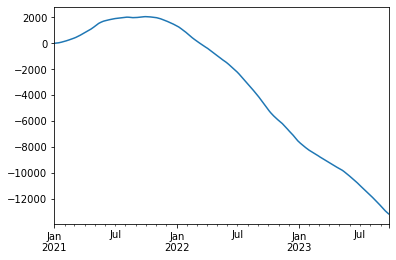

In [54]:
ts.plot()

In [59]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index = ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()
df

,A,B,C,D
2021-01-01,0.884750,-0.759887,0.862455,2.441872
2021-01-02,1.661564,-0.219535,0.520615,2.114927
2021-01-03,1.968066,-0.734379,-0.088085,1.575363
2021-01-04,2.755208,0.694391,-0.932605,1.438605
2021-01-05,2.589038,0.067638,-1.420819,1.418418
...,...,...,...,...
2023-09-23,49.633436,-17.762424,-53.484072,-17.391125
2023-09-24,50.809150,-17.728165,-53.461827,-15.594632
2023-09-25,50.317054,-17.473871,-52.427955,-16.987291
2023-09-26,50.156341,-17.827214,-52.728307,-15.701237


In [60]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

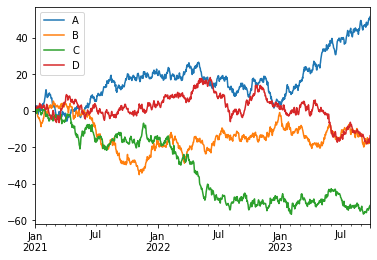

In [61]:
df.plot()

No handles with labels found to put in legend.


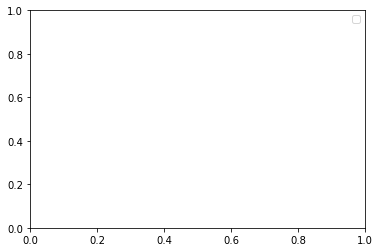

In [58]:
plt.legend(loc='best')

## Getting data in/out

- CSV : df.to_csv("foo.csv")
- HDF5 : df.to_hdf("foo.h5", "df")
- Excel : df.to_excel("foo.xlsx", sheet_name="Sheet1")